In [1]:
import pandas as pd
import numpy as np

In [2]:
fifa = pd.read_csv('fifa.csv')

In [3]:
pd.set_option('display.max_columns', None)
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
fifa.shape

(18207, 89)

In [5]:
ratings = fifa['Overall']
rating_mean = np.mean(ratings)

In [6]:
rating_mean

66.23869940132916

In [7]:
rating_std = np.std(ratings)
rating_std

6.908739876493177

In [8]:
rating_min = np.min(ratings)
rating_min

46

In [9]:
rating_max = np.max(ratings)
rating_max

94

In [10]:
np.histogram(ratings)

(array([ 192,  998, 2363, 4727, 4289, 3570, 1513,  445,   96,   14],
       dtype=int64),
 array([46. , 50.8, 55.6, 60.4, 65.2, 70. , 74.8, 79.6, 84.4, 89.2, 94. ]))

In [11]:
right_foot = fifa[fifa['Preferred Foot'] == 'Right']
left_foot = fifa[fifa['Preferred Foot'] == 'Left']

In [12]:
print("Right foot Players:", len(right_foot), "Left foot Players:", len(left_foot))

Right foot Players: 13948 Left foot Players: 4211


In [13]:
def distributions_by_country(data, selected_column):
    countries = set(data['Nationality'])
        
    countries_dict = {}
    for c in countries:
        countries_dict[c] = data[data['Nationality'] == c][selected_column]
        
    return countries_dict

In [14]:
countries_foot = distributions_by_country(fifa, 'Preferred Foot')

countries_length = [len(countries_foot[c]) for c in countries_foot]
print(np.median(countries_length))
print(np.mean(countries_length))

# Finding top left-foot countries with more players than the median

percent_left = {}
countries_players = []
for c in list(countries_foot.keys()):
    counts = countries_foot[c].value_counts()
    len_counts = counts.sum()
    if 'Left' in counts.keys() and len_counts > np.median(countries_length):
        percent_left[c] = counts['Left'] / len_counts
        countries_players.append(len_counts)
        
percent_left = dict(sorted(percent_left.items(), key = lambda l:l[1], reverse=True))
percent_left

15.0
111.01829268292683


{'Costa Rica': 0.4,
 'Algeria': 0.3333333333333333,
 'Paraguay': 0.32142857142857145,
 'Greece': 0.3137254901960784,
 'Montenegro': 0.30434782608695654,
 'Mali': 0.3023255813953488,
 'India': 0.3,
 'Brazil': 0.296969696969697,
 'Iran': 0.29411764705882354,
 'Tunisia': 0.28125,
 'Scotland': 0.2791519434628975,
 'Spain': 0.27824463118580767,
 'Serbia': 0.2777777777777778,
 'Turkey': 0.2739273927392739,
 'Kosovo': 0.2727272727272727,
 'Italy': 0.2703862660944206,
 'South Africa': 0.2676056338028169,
 'Canada': 0.265625,
 'France': 0.25905598243688255,
 'Morocco': 0.25882352941176473,
 'Republic of Ireland': 0.2554347826086957,
 'Uruguay': 0.2550335570469799,
 'Saudi Arabia': 0.2522255192878338,
 'FYR Macedonia': 0.25,
 'Austria': 0.25,
 'Honduras': 0.25,
 'Ukraine': 0.2465753424657534,
 'Mexico': 0.24383561643835616,
 'Netherlands': 0.2411504424778761,
 'Romania': 0.24074074074074073,
 'Ghana': 0.23684210526315788,
 'Bolivia': 0.23333333333333334,
 'England': 0.23295111647555825,
 'Albani

In [15]:
top_left = pd.DataFrame.from_dict(percent_left, orient='index', columns=['Percent of Left Players'])
top_left['# Players'] = countries_players
top_left.head()

,Percent of Left Players,# Players
Costa Rica,0.400000,32
Algeria,0.333333,936
Paraguay,0.321429,52
Greece,0.313725,335
Montenegro,0.304348,79


In [16]:
age = fifa['Age']
age_mean = np.mean(age)
age_std = np.std(age)
age_min = np.min(age)
age_max = np.max(age)
age_hist = np.histogram(age)

In [17]:
import numpy as np
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup as Soup

url = "https://sofifa.com/players?offset="
flags = {}
column = ['Nation', 'Flag']

for offset in range(0,1):
    url = url + str(offset*61)
    p_html = requests.get(url)
    p_soup = p_html.text
    data = Soup(p_soup,'html.parser')
    table = data.find('tbody')
    for i in table.findAll('tr'): 
        td = i.findAll('td')
        nation = td[1].find('img').get('title')
        flag = td[1].find('img').get('data-src')
        
        flags[nation] = flag
        
flags

{'Brazil': 'https://cdn.sofifa.com/flags/br.png',
 'Italy': 'https://cdn.sofifa.com/flags/it.png',
 'England': 'https://cdn.sofifa.com/flags/gb-eng.png',
 'Ukraine': 'https://cdn.sofifa.com/flags/ua.png',
 'Portugal': 'https://cdn.sofifa.com/flags/pt.png',
 'France': 'https://cdn.sofifa.com/flags/fr.png',
 'Norway': 'https://cdn.sofifa.com/flags/no.png',
 'United States': 'https://cdn.sofifa.com/flags/us.png',
 'Germany': 'https://cdn.sofifa.com/flags/de.png',
 'Republic of Ireland': 'https://cdn.sofifa.com/flags/ie.png',
 'Spain': 'https://cdn.sofifa.com/flags/es.png',
 'Croatia': 'https://cdn.sofifa.com/flags/hr.png',
 'Netherlands': 'https://cdn.sofifa.com/flags/nl.png',
 'Sweden': 'https://cdn.sofifa.com/flags/se.png',
 'Argentina': 'https://cdn.sofifa.com/flags/ar.png',
 'Czech Republic': 'https://cdn.sofifa.com/flags/cz.png',
 'Uruguay': 'https://cdn.sofifa.com/flags/uy.png',
 'Ivory Coast': 'https://cdn.sofifa.com/flags/ci.png',
 'Greece': 'https://cdn.sofifa.com/flags/gr.png',


In [18]:
print(age_mean)
print(age_std)
print(age_min)
print(age_max)

25.122205745043114
4.669814465849161
16
45


### Visualizations ###

In [19]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=ratings, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Ratings Distribution')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

C:\Users\dliau\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3461: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


(0.0, 1170.0)

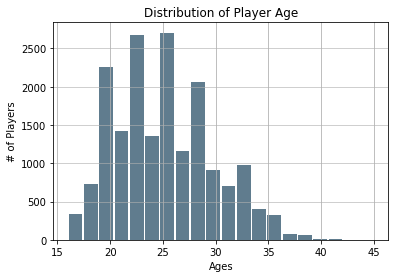

In [20]:
# Generate data on commute times.
size, scale = 1000, 10

age.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Distribution of Player Age')
plt.xlabel('Ages')
plt.ylabel('# of Players')
plt.grid(axis='y', alpha=0.75)

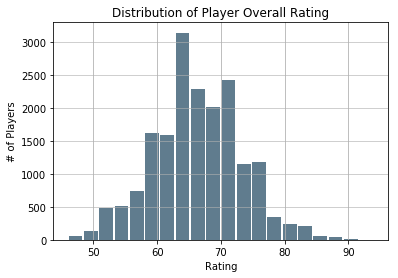

In [21]:
ratings.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Distribution of Player Overall Rating')
plt.xlabel('Rating')
plt.ylabel('# of Players')
plt.grid(axis='y', alpha=0.75)

(0.0, 100.0)

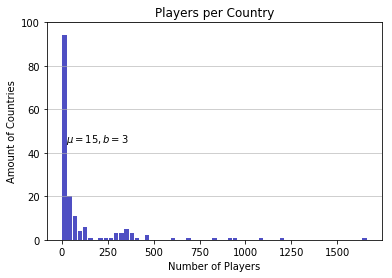

In [22]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=countries_length, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Number of Players')
plt.ylabel('Amount of Countries')
plt.title('Players per Country')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

# Clustering Teams #

In [23]:
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [24]:
test = fifa[:5]
del test['Photo'], test['Flag'], test['Club Logo']
test.head()

,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [25]:
teams_fifa = fifa[['Club', 'Age', 'Overall', 'Wage']] # Value, Wage, Height, Weight, Release Clause

In [26]:
# convert player wages to sensible units
# remove euro sign
wages = teams_fifa.Wage.apply(lambda x: x[1:])
# convert M and K by their respective multipliers
teams_fifa.Wage = wages.apply(lambda x: float(x[:-1])*1e6 if "m" in x.lower() else (float(x[:-1])*1000 if "k" in x.lower() else float(x)))

C:\Users\dliau\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [27]:
# # convert player values to sensible units
# # remove euro sign
# values = teams_fifa.Value.apply(lambda x: x[1:])
# # convert M and K by their respective multipliers
# teams_fifa.Value = values.apply(lambda x: float(x[:-1])*1e6 if "m" in x.lower() else (float(x[:-1])*1000 if "k" in x.lower() else float(x)))

In [28]:
teams_fifa.head()

,Club,Age,Overall,Wage
0,FC Barcelona,31,94,565000.0
1,Juventus,33,94,405000.0
2,Paris Saint-Germain,26,92,290000.0
3,Manchester United,27,91,260000.0
4,Manchester City,27,91,355000.0


In [29]:
teams = teams_fifa.set_index('Club')
teams = teams.groupby('Club').median()
teams.head()

,Age,Overall,Wage
Club,,,
SSV Jahn Regensburg,25.0,66.0,4000.0
1. FC Heidenheim 1846,23.5,67.0,4000.0
1. FC Kaiserslautern,23.0,65.0,1000.0
1. FC Köln,24.0,73.0,15500.0
1. FC Magdeburg,23.5,66.5,4000.0


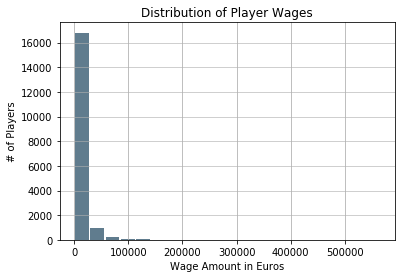

In [30]:
# Generate data on commute times.
size, scale = 1000, 10

wages = teams_fifa['Wage']

wages.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Distribution of Player Wages')
plt.xlabel('Wage Amount in Euros')
plt.ylabel('# of Players')
plt.grid(axis='y', alpha=0.75)

In [31]:
teams_fifa[teams_fifa['Club'] == 'FC Barcelona'].median()

Age            23.0
Overall        82.0
Wage       125000.0
dtype: float64

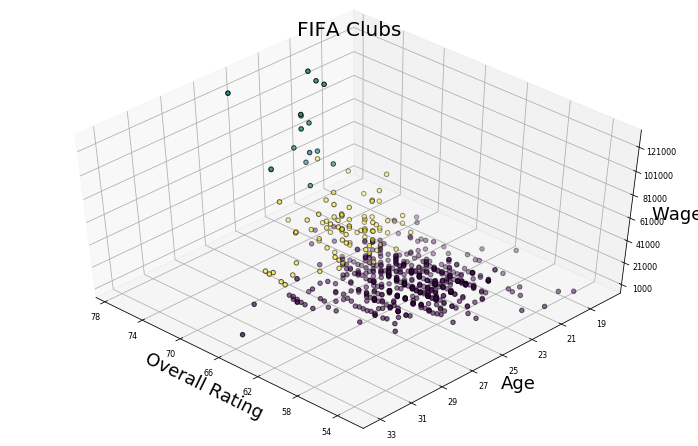

In [66]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

X = teams.values

plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=18) 
plt.rcParams.update({'font.size': 8})

fig = plt.figure(figsize=(10,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
est = KMeans(n_clusters=3)
est.fit(X)
labels = est.labels_

ax.scatter(X[:, 1], X[:, 0], X[:, 2],
       c=labels.astype(float), edgecolor='k')

min_0 = int(X[:,0].min())
max_0 = int(X[:,0].max())
min_1 = int(X[:,1].min())
max_1 = int(X[:,1].max())
min_2 = int(X[:,2].min())
max_2 = int(X[:,2].max())

ax.w_xaxis.set_ticklabels(range(min_1, max_1, 4))
ax.w_yaxis.set_ticklabels(range(min_0, max_0, 2))
ax.w_zaxis.set_ticklabels(range(min_2, max_2, 20000))
ax.set_xlabel('Overall Rating')
ax.set_ylabel('Age')
ax.set_zlabel('Wage')
ax.set_title('FIFA Clubs')
                    
plt.show()

In [33]:
X[:,2].min()
X[:,2].max()

125000.0

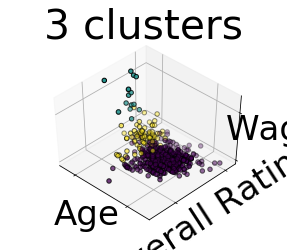

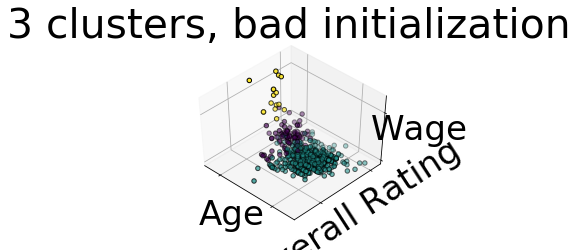

In [34]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

X = teams.values

estimators = [('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 1], X[:, 0], X[:, 2],
               c=labels.astype(float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Age')
    ax.set_ylabel('Overall Rating')
    ax.set_zlabel('Wage')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

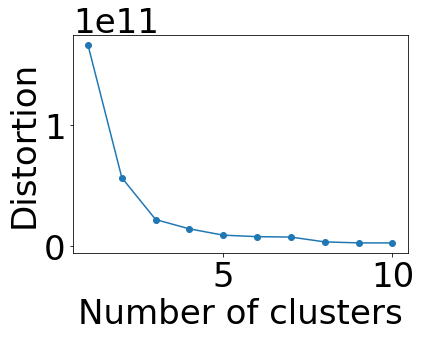

In [35]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [36]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

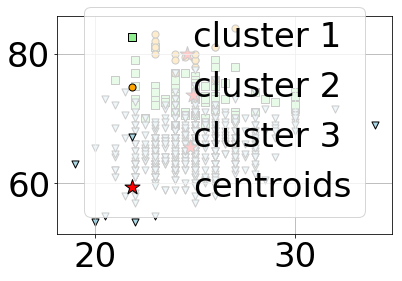

In [37]:
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

[]

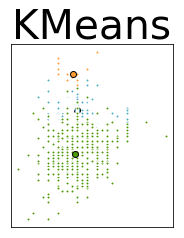

In [38]:
# KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin

k_means_cluster_centers = km.cluster_centers_

fig = plt.figure(figsize=(8, 3))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)

ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(3), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())

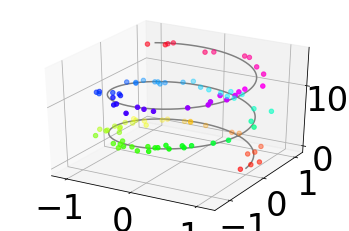

In [39]:
from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection="3d")

z_line = np.linspace(0, 15, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)
ax.plot3D(x_line, y_line, z_line, 'gray')

z_points = 15 * np.random.random(100)
x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

plt.show()